### Stackoverflow Survey analysis using Numpy, Pandas and Matplotlib

 In this notebook I will analyse stackoverflow developer survey. You can find datasets here: https://insights.stackoverflow.com/survey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.size'] = '14'

In [3]:
df = pd.read_csv('survey_results_public.csv')
df1 = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df1.head()

Column
Respondent    Randomized respondent ID number (not in order ...
MainBranch    Which of the following options best describes ...
Hobbyist                                Do you code as a hobby?
Age           What is your age (in years)? If you prefer not...
Age1stCode    At what age did you write your first line of c...
Name: QuestionText, dtype: object

In [6]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
df.shape

(64461, 61)

 The data set contains 64461 rows and 61 columns meand 64461 persons take this survey and 61 quetions have been asked from each person

In [8]:
# df.info()

### Data Preparation & Cleaning

##### Survey contains a lot of information but we limit to analysis to
* Demographics

* Programing Languages

* Employment information

##### Now, I will select columns related to these topics

In [9]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [10]:
len(selected_columns)

20

In [11]:
survey_df = df[selected_columns].copy()

In [12]:
schema_df = df1[selected_columns].copy()

In [13]:
survey_df.shape

(64461, 20)

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [16]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


 There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. Lets fix this

In [17]:
survey_df.drop(survey_df[survey_df.Age < 10].index , inplace=True)

In [18]:
survey_df.drop(survey_df[survey_df.Age > 100].index , inplace=True)

In [19]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


 The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [20]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index , inplace=True)

In [21]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [22]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [23]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
32390,France,18.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,9.0,9.0,NaN,Bash/Shell/PowerShell;C;Java;Python,Bash/Shell/PowerShell;C;Python;Rust,Every few months,Play games;Visit Stack Overflow;Panic;Watch he...,Student,NaN,NaN,NaN,NaN,NaN,NaN
31865,Poland,35.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,13.0,16.0,12.0,Bash/Shell/PowerShell;C;C#;Go;HTML/CSS;Java;Ja...,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, back-end",50.0,Slightly satisfied,Specific department or team I’d be working on;...,Occasionally: 1-2 days per quarter but less th...,Very important
52870,United States,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,7.0,NaN,Assembly;Bash/Shell/PowerShell;C;C++;Java;Pyth...,C++;Java;Python;SQL,Every few months,Play games;Visit Stack Overflow;Do other work ...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Remote work o...,NaN,NaN
57905,Philippines,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,18.0,NaN,NaN,C++;HTML/CSS;Java;PHP,NaN,NaN,Play games,Student,NaN,NaN,NaN,Family friendliness,NaN,NaN
25843,United States,NaN,"Non-binary, genderqueer, or gender non-conforming","Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,25.0,15.0,Assembly;C;C++;HTML/CSS;JavaScript;Perl;PHP;Py...,Assembly;Rust,Every few months,Panic,Employed full-time,"Developer, back-end;System administrator",28.0,Very satisfied,Diversity of the company or organization;Flex ...,Never,Critically important
35366,Brazil,19.0,Woman,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,10.0,5.0,2.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Langu...,Often: 1-2 days per week or more,Very important
2319,United States,49.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,14.0,36.0,20.0,C;C#;VBA,C;C#;VBA,Once a decade,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Critically important
9547,Italy,37.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,32.0,5.0,5.0,HTML/CSS;JavaScript;PHP,HTML/CSS;JavaScript;PHP;Python,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Designer;Developer, front-end;Developer, full-...",30.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Somewhat important
36020,United States,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",No,18.0,12.0,7.0,Bash/Shell/PowerShell;Go;JavaScript;Kotlin;SQL...,Go;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,Specific department or team I’d be working on;...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
3195,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information sy

### EDA

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [24]:
schema_df.Country

'Where do you live?'

In [25]:
survey_df.Country.nunique()

183

In [26]:
top_countries = survey_df.Country.value_counts().head(15)

In [27]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

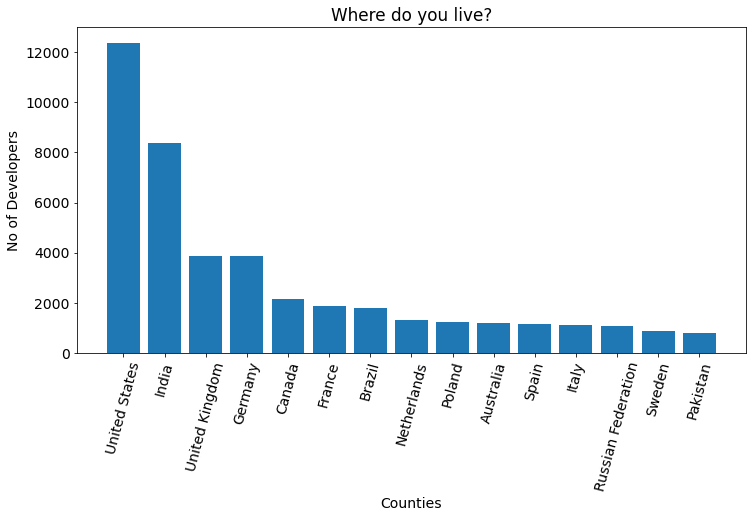

In [28]:
plt.figure(figsize=(12,6))
plt.bar(top_countries.index, top_countries)
plt.title(schema_df.Country)
plt.xlabel("Counties")
plt.ylabel("No of Developers")
plt.xticks(rotation=75)
plt.show()

 It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

In [29]:
schema_df.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

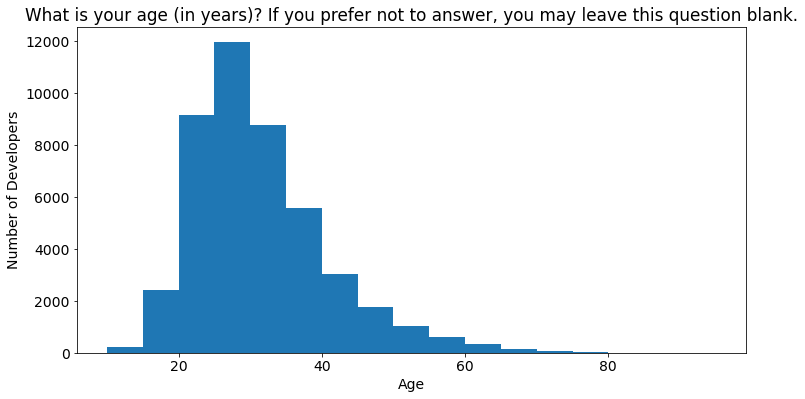

In [30]:
plt.figure(figsize=(12,6))
plt.hist(survey_df.Age, bins=np.arange(10, 100,5))
plt.xlabel("Age")
plt.ylabel("Number of Developers")
plt.title(schema_df.Age)
plt.show()

 It appears that a large percentage of respondents are 20-45 years old. 

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [31]:
gender = survey_df.Gender.value_counts()

In [32]:
gender

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

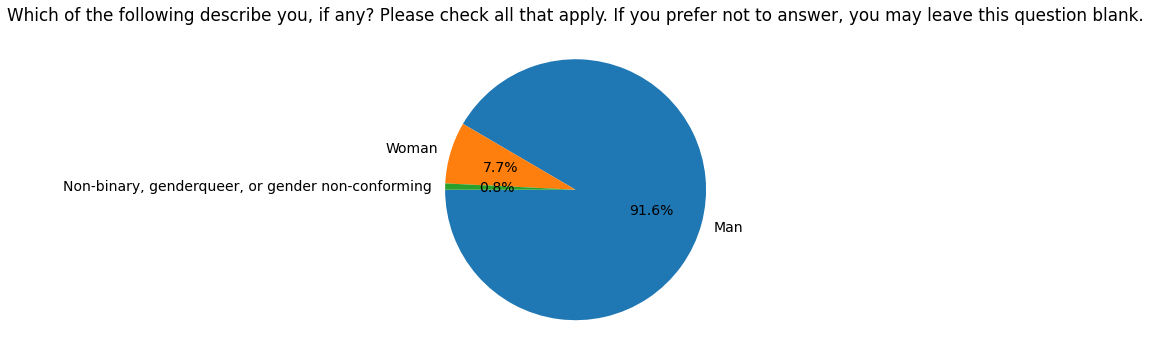

In [33]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Gender)
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=180);

 Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [34]:
schema_df.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [35]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

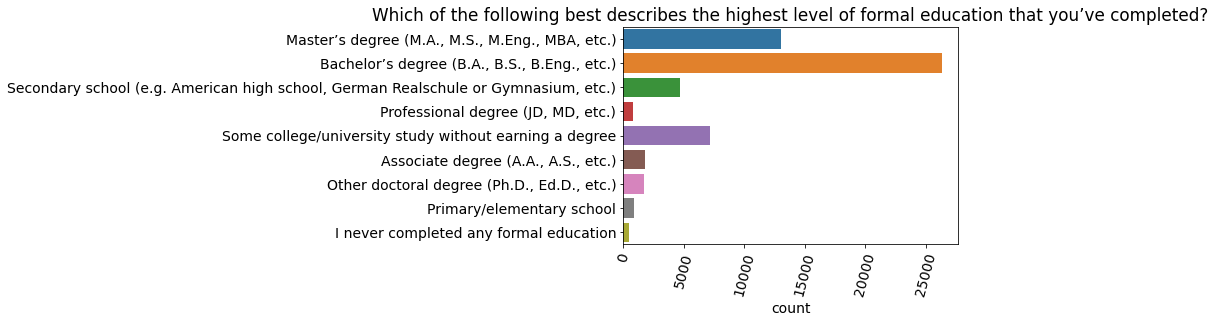

In [36]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema_df.EdLevel)
plt.ylabel(None);

 It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

In [37]:
schema_df.UndergradMajor

'What was your primary field of study?'

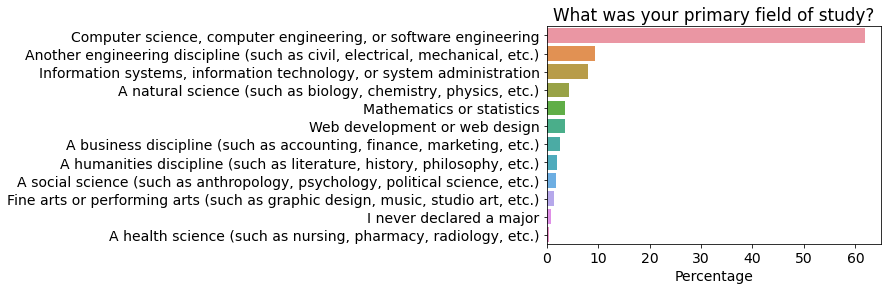

In [38]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema_df.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

 It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging

In [39]:
schema_df.Employment

'Which of the following best describes your current employment status?'

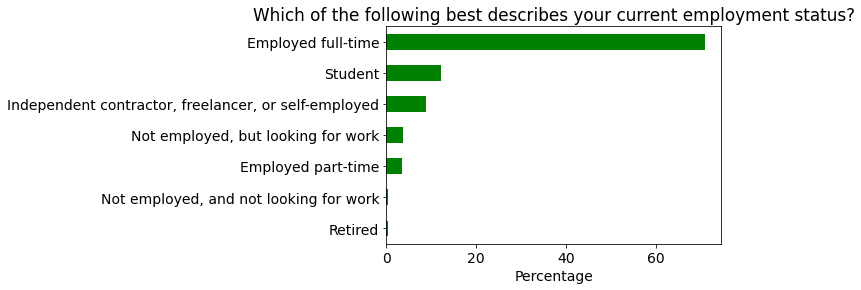

In [40]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema_df.Employment)
plt.xlabel('Percentage');

In [41]:
schema_df.DevType

'Which of the following describe you? Please select all that apply.'

In [42]:
survey_df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [43]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [44]:
def split_values(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [45]:
devtype_df = split_values(survey_df.DevType)

In [46]:
devtype_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
devtype_totals = devtype_df.sum().sort_values(ascending=False)
devtype_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

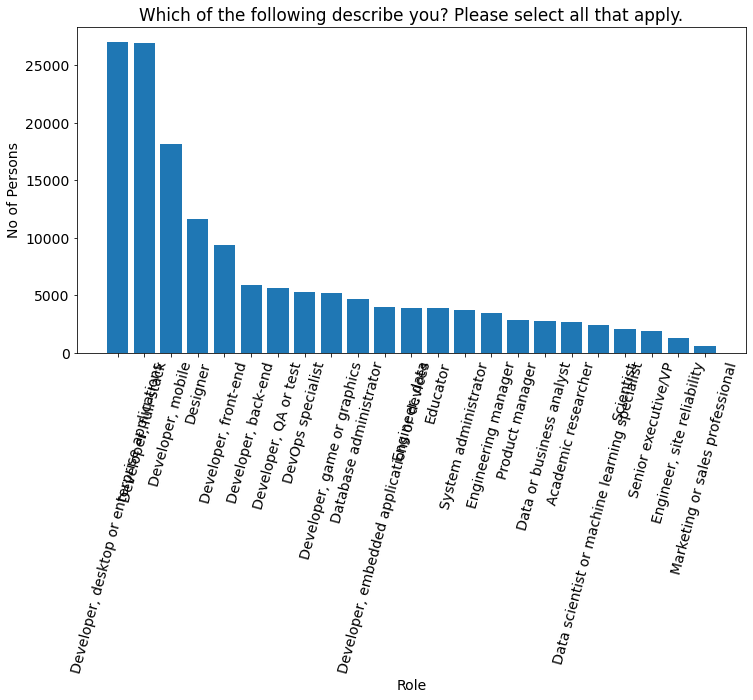

In [48]:
plt.figure(figsize=(12,6))
plt.bar(devtype_df.columns, devtype_totals.values)
plt.title(schema_df.DevType)
plt.xlabel("Role")
plt.ylabel("No of Persons")
plt.xticks(rotation=75)
plt.show()

## Asking and Answering Questions

#### Q: What are the most popular programming languages in 2020? 

In [49]:
schema_df.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [50]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [51]:
language_df = split_values(survey_df.LanguageWorkedWith)

In [52]:
language_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
languages_percentages = language_df.mean().sort_values(ascending=False) * 100
languages_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

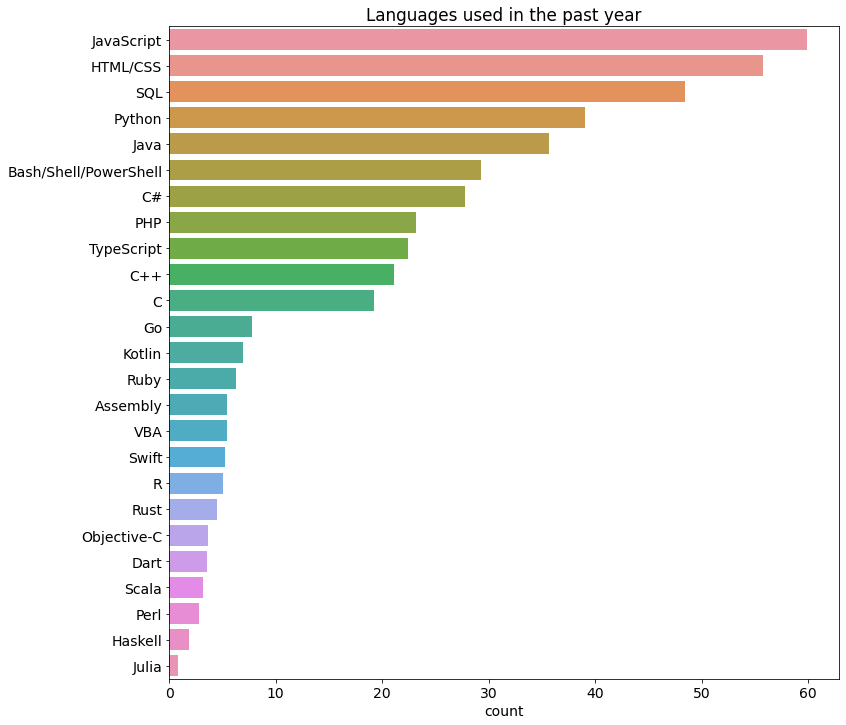

In [54]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_percentages, y=languages_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

 Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills.

#### Q: Which languages are the most people interested to learn over the next year?

In [56]:
languages_interested_df = split_values(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

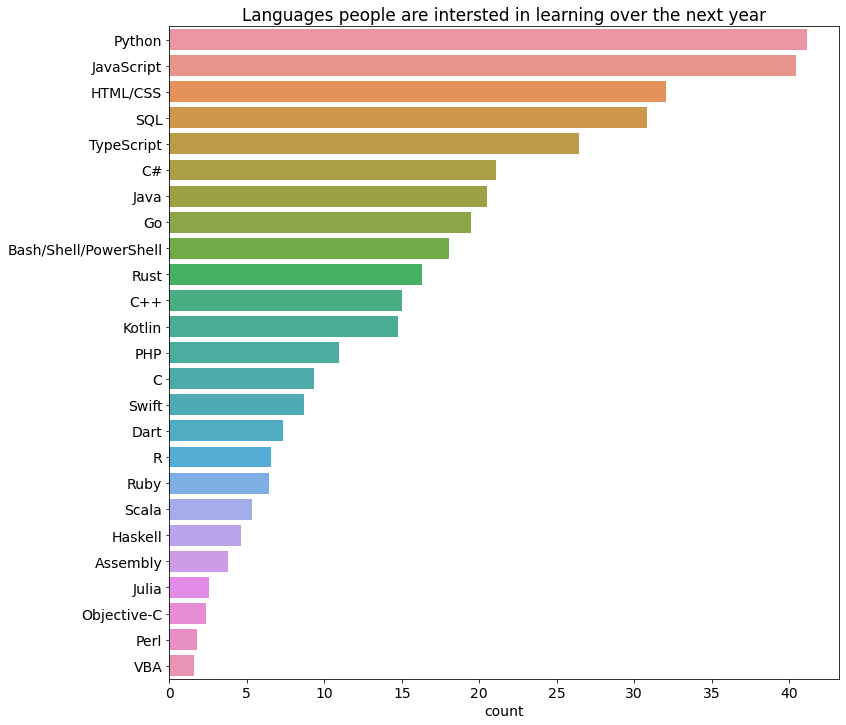

In [57]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

 Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains

### Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

In [60]:
languages_loved_df = language_df & languages_interested_df

In [62]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ language_df.sum()).sort_values(ascending=False)

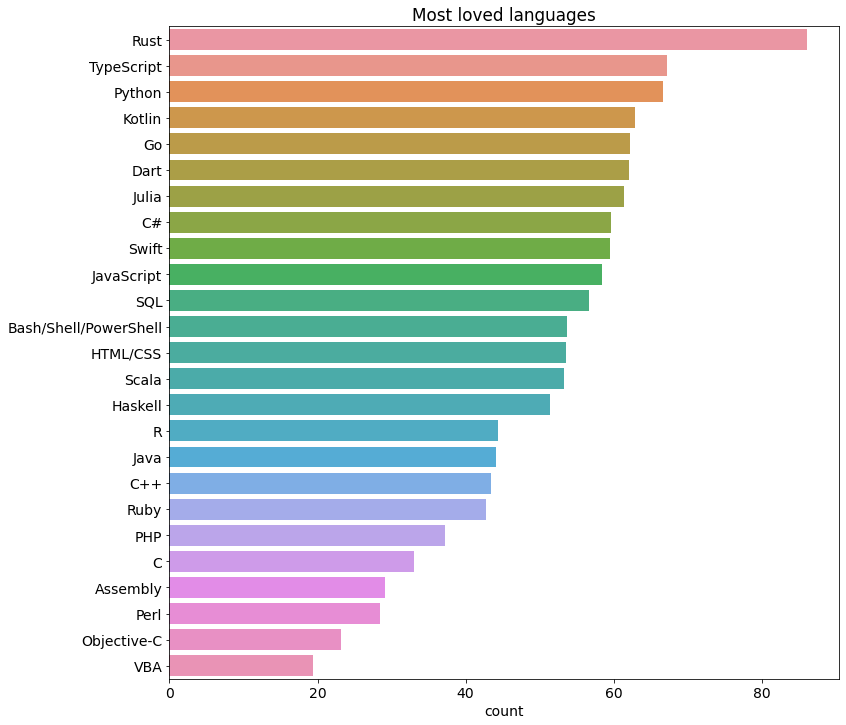

In [63]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

 Rust has been StackOverflow's most-loved language for four years in a row. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [64]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [65]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [66]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


 The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

## Inferences and Conclusions

I've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.